**Step-1**

**Import required packages**

- Package-1: Related to blob

  - pip install azure-storage-blob azure-identity

- Package-2: Related to Azure Document Intelligence serivce

  - pip install azure-ai-formrecognizer


**Step-2**

- Create Azure Document Intelligence service

- Go to azure portal 

- Search for Azure AI services

- Under that we have Document intelligence service

- Create your services

- Once you created , Go to service main page

- We need **keys and endpoint**

In [9]:
!pip install azure-storage-blob azure-identity

In [8]:
!pip install azure-ai-formrecognizer

In [ ]:
key='Access KEY Need to Download From AZURE PORTAL'
end_point="https://'-----'.cognitiveservices.azure.com/"

In [11]:
from azure.core.credentials import AzureKeyCredential
from azure.ai.formrecognizer import DocumentAnalysisClient
credential = AzureKeyCredential(key)
document_analysis_client = DocumentAnalysisClient(end_point, credential)

**Step-3**

- Imagine the file is uploaded already in storage services

- Connect to the Container

- See your blob(or file avialable)

- Connect to blob and read the image

- Get blob url

In [ ]:
from azure.storage.blob import BlobServiceClient
blob_account_url='https://'------'.blob.core.windows.net'
storage_credential='Access KEY Need to Download From AZURE PORTAL'

blob_service_client=BlobServiceClient(account_url=blob_account_url,
                                      credential=storage_credential)

blob_service_client

In [13]:
all_containers=blob_service_client.list_containers()
list(all_containers)

[{'name': 'createcontainer', 'last_modified': datetime.datetime(2025, 6, 29, 10, 21, 53, tzinfo=datetime.timezone.utc), 'etag': '"0x8DDB6F6C4B9D61F"', 'lease': {'status': 'unlocked', 'state': 'available', 'duration': None}, 'public_access': 'container', 'has_immutability_policy': False, 'deleted': None, 'version': None, 'has_legal_hold': False, 'metadata': None, 'encryption_scope': <azure.storage.blob._models.ContainerEncryptionScope object at 0x0000022C02D4DDC0>, 'immutable_storage_with_versioning_enabled': False},
 {'name': 'imagecontainer', 'last_modified': datetime.datetime(2025, 6, 29, 9, 49, 46, tzinfo=datetime.timezone.utc), 'etag': '"0x8DDB6F247F8C2E0"', 'lease': {'status': 'unlocked', 'state': 'available', 'duration': None}, 'public_access': 'container', 'has_immutability_policy': False, 'deleted': None, 'version': None, 'has_legal_hold': False, 'metadata': None, 'encryption_scope': <azure.storage.blob._models.ContainerEncryptionScope object at 0x0000022C02DFFB90>, 'immutable_

In [ ]:
#container_client = blob_service_client.get_container_client('azuraimlcontainer')
#for blob in container_client.list_blobs():
#    print(blob.name)

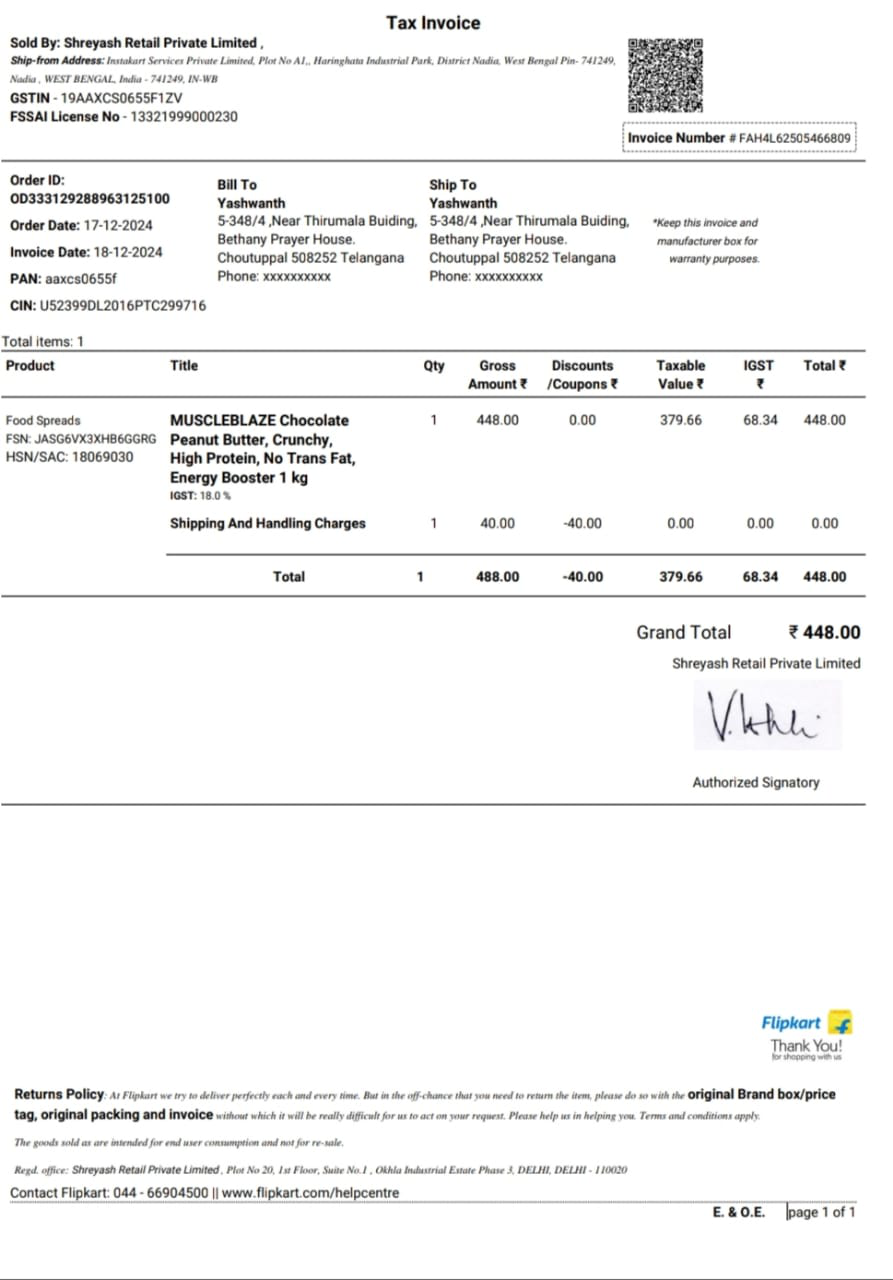

In [15]:
blob_client= blob_service_client.get_blob_client('invoicecontainer','Bill.jpg')
data=blob_client.download_blob()
from PIL import Image
image=Image.open(data)
image

**Step-3**

**Using blob url**

In [ ]:
# Initialize Blob Client
from azure.storage.blob import BlobClient
blob_account_url='https://'----'.blob.core.windows.net'
storage_credential='Access KEY Need to Download From AZURE PORTAL'
blob_url = 'https://'----'.blob.core.windows.net/invoicecontainer/Bill.jpg'

blob_client = BlobClient.from_blob_url(blob_url=blob_url, credential=storage_credential)

# Download the image invoice from Azure Storage
with open("invoice_image.jpg", "wb") as download_file:
    download_file.write(blob_client.download_blob().readall())

# Analyze the image using Document Intelligence
with open("invoice_image.jpg", "rb") as invoice_image:
    poller = document_analysis_client.begin_analyze_document("prebuilt-invoice", document=invoice_image)
    result = poller.result()

    # Print out the extracted data
    for idx, invoice in enumerate(result.documents):
        print(f"============Recognise Invoice: {idx + 1}===================")
        #for name, field in invoice.fields.items():
            #print(f"{name}: {field.value}")
        for i in invoice.fields:
            print(i)
            print(f"{i}:{invoice.fields[i].value}")


============Recognise Invoice: 1===================
BillingAddress
BillingAddress:AddressValue(house_number=5-348/4 ,Near Thirumala, po_box=None, road=None, city=Choutuppal, state=Telangana, postal_code=508252, country_region=None, street_address=5-348/4 ,Near Thirumala, unit=None, city_district=None, state_district=None, suburb=None, house=Buiding,
Bethany Prayer House., level=None)
BillingAddressRecipient
BillingAddressRecipient:Yashwanth
CustomerName
CustomerName:Yashwanth
InvoiceDate
InvoiceDate:2024-12-18
InvoiceId
InvoiceId:FAH4L62505466809
InvoiceTotal
InvoiceTotal:₹448.0
Items
Items:[DocumentField(value_type=dictionary, value={'Amount': DocumentField(value_type=currency, value=CurrencyValue(amount=448.0, symbol=None, code=INR), content=448.00, bounding_regions=[BoundingRegion(page_number=1, polygon=[Point(x=803.0, y=412.0), Point(x=846.0, y=412.0), Point(x=846.0, y=427.0), Point(x=803.0, y=427.0)])], spans=[DocumentSpan(offset=910, length=6)], confidence=0.063), 'Description': 

In [17]:
for idx, invoice in enumerate(result.documents):
    print(f"============Recognise Invoice: {idx + 1}===================")
    for i in invoice.fields:
        if i=='Items':
            value=invoice.fields[i].value[0].value['Amount'].value
            item=invoice.fields[i].value[0].value['Description'].value
            print(f"{item} has {value}")

============Recognise Invoice: 1===================
MUSCLEBLAZE Chocolate
Peanut Butter, Crunchy,
High Protein, No Trans Fat,
Energy Booster 1 kg
IGST: 18.0% has 448.0


In [20]:
for idx, invoice in enumerate(result.documents):
    print(f"============Recognise Invoice: {idx + 1}===================")
    for i in invoice.fields:
        if i=='Items':
            print(len(invoice.fields[i].value))
            

============Recognise Invoice: 1===================
2


In [19]:
for idx, invoice in enumerate(result.documents):
    print(f"============Recognise Invoice: {idx + 1}===================")
    for i in invoice.fields:
        if i=='Items':
            for element in range(len(invoice.fields[i].value)):
                value=invoice.fields[i].value[element].value['Amount'].value
                item=invoice.fields[i].value[element].value['Description'].value
                print(f"{item} has {value}")
        if i!='Items':
             print(f"{i}:{invoice.fields[i].value}")

============Recognise Invoice: 1===================
BillingAddress:AddressValue(house_number=5-348/4 ,Near Thirumala, po_box=None, road=None, city=Choutuppal, state=Telangana, postal_code=508252, country_region=None, street_address=5-348/4 ,Near Thirumala, unit=None, city_district=None, state_district=None, suburb=None, house=Buiding,
Bethany Prayer House., level=None)
BillingAddressRecipient:Yashwanth
CustomerName:Yashwanth
InvoiceDate:2024-12-18
InvoiceId:FAH4L62505466809
InvoiceTotal:₹448.0
MUSCLEBLAZE Chocolate
Peanut Butter, Crunchy,
High Protein, No Trans Fat,
Energy Booster 1 kg
IGST: 18.0% has 448.0
Shipping And Handling Charges has 0.0
PurchaseOrder:OD333129288963125100
ShippingAddress:AddressValue(house_number=5-348/4 ,Near Thirumala, po_box=None, road=None, city=Choutuppal, state=Telangana, postal_code=508252, country_region=None, street_address=5-348/4 ,Near Thirumala, unit=None, city_district=None, state_district=None, suburb=None, house=Buiding,
Bethany Prayer House., lev